# University of science
## Advanced Machine Learning - Lab 03
## Nguyễn Quốc Bảo - 18110053

Lab03:

Ở bài thực hành này chúng ta thử custom vào từng layer của tensorflow hay nói cách khác là code theo dạng low-level

In [1]:
#import thư viện cần thiết
## thư viện machine learning và hỗ trợ
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.models import Sequential

## thư viện để vẽ đồ thị
import matplotlib.pyplot as plt


In [2]:
#hàm build có tác dụng sẽ tự động khởi tạo các weights 
#hàm call sẽ tự động tính toán cho layer
class Linear(tf.keras.layers.Layer):
    def __init__(self, units=100):
        super().__init__() 
        self.units = units #Định nghĩa số hidden nodes cho lớp Fully Connected 
    def build(self, input_shape):
        #Định nghĩa ma trận weight W
        ##shape là kích thước của ma trận
        ##initializer là initial weight của ma trận
        ##trainble cho phép ma trận có được cập nhật sau mỗi lần training hay không
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer=tf.random_normal_initializer,
                                 trainable=True,
                                 name="w1") 
        
        #Định nghĩa bias để cộng thêm vào lớp FC
        self.b = self.add_weight(shape=(self.units,),
                                 initializer=tf.random_normal_initializer,
                                 trainable=True,
                                 name="b1")
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)




In [3]:
#Chạy thử
x = tf.ones((1, 2))
linear_layer = Linear(100) ##hàm __init__ được gọi
y = linear_layer(x)  ##hàm build và call được gọi
print(y)

tf.Tensor(
[[0.00900003 0.         0.1981614  0.         0.0691124  0.
  0.         0.         0.09806626 0.05103619 0.16243525 0.050644
  0.11277376 0.         0.00073051 0.         0.         0.
  0.03984766 0.2024529  0.         0.21731752 0.16608244 0.
  0.         0.         0.         0.0506441  0.         0.06832841
  0.         0.04933136 0.11189217 0.         0.08759791 0.
  0.         0.         0.02315946 0.         0.00968418 0.
  0.00040436 0.02614306 0.05696829 0.10442799 0.08296447 0.
  0.05070743 0.         0.         0.         0.         0.
  0.         0.01521912 0.         0.         0.         0.13815343
  0.08189351 0.         0.01930403 0.         0.         0.03909709
  0.08736596 0.         0.07047623 0.         0.         0.06605398
  0.         0.         0.         0.         0.         0.00874726
  0.         0.03344254 0.         0.03931393 0.         0.
  0.04759996 0.10722754 0.00089661 0.         0.03282719 0.03397638
  0.05143884 0.         0.         

In [4]:
#in thử các weights có trong block
for i in linear_layer.trainable_variables:
    print(i.name)

linear/w1:0
linear/b1:0


In [5]:
#shape của kernel trong conv được định nghĩa theo dạng:
# (width, height, dimension, number_of_filters)
class ConvMaxpoolBlock(tf.keras.layers.Layer):
    def __init__(self, filter_size, n_filters):
        super().__init__()
        self.filter_size = filter_size #định nghĩa window size 
        self.n_filters = n_filters #định nghĩa số filters
    def build(self, input_shape):
        self.kernel = self.add_weight(name="kernel",
                                      shape=(self.filter_size[0], self.filter_size[1], input_shape[-1], self.n_filters),
                                      initializer=tf.random_normal_initializer,
                                      trainable=True)
        self.bias = self.add_weight(name="bias",
                                      shape=(1,self.n_filters),
                                      initializer=tf.random_normal_initializer,
                                      trainable=True)
    def call(self, inputs):
        conv = K.conv2d(x=inputs,
                        kernel=self.kernel,
                        padding="same")
        conv = conv+self.bias
        conv = tf.nn.relu(conv)
        maxpool = K.pool2d(conv, 
                           pool_size=(2,2), 
                           strides=(2,2),
                          pool_mode='max')
        return maxpool

In [6]:
## Thử xem những tham số và kích thước của layer với input là ảnh (300,300,3)
inputs = tf.keras.layers.Input(shape=(300,300,3))
conv = ConvMaxpoolBlock(filter_size=[5,5], n_filters=10)  
conv_output = conv(inputs)                                ##hàm build và call được gọi

## In các biến train được của layer
print(conv.trainable_variables)
## In output của layer
print(conv_output.shape)

[<tf.Variable 'conv_maxpool_block/kernel:0' shape=(5, 5, 3, 10) dtype=float32, numpy=
array([[[[ 9.67940409e-03,  5.76046354e-04, -8.42521563e-02,
          -6.28045574e-02,  2.01962818e-03, -5.31301685e-02,
           2.98679974e-02,  1.03851510e-02,  2.14880444e-02,
          -5.31653129e-03],
         [-1.80999469e-02,  3.59507464e-03, -5.57834096e-02,
          -2.40669828e-02,  8.50250348e-02, -7.05330214e-03,
          -2.86708008e-02,  3.82490866e-02,  5.39044403e-02,
           4.74449992e-02],
         [-2.64329053e-02, -5.27414791e-02,  7.01330379e-02,
          -5.29364236e-02, -5.66797554e-02,  3.71379107e-02,
           6.05183803e-02, -1.99473817e-02, -4.52068523e-02,
           2.85566188e-02]],

        [[ 1.44872786e-02, -1.31568134e-01,  5.82414456e-02,
          -4.18546014e-02,  2.33378075e-03,  5.44940829e-02,
          -4.89370786e-02, -5.46742193e-02, -1.32708941e-02,
           4.10298035e-02],
         [-4.02281098e-02, -9.61984601e-03, -4.31643277e-02,
       

# Bài tập 

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test
Mỗi ảnh có một kênh màu, kích thước 28x28

Ảnh đầu tiên của tập train
Label đầu tiên của tập train:  2


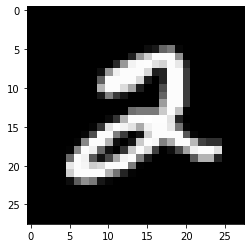

In [7]:
# Tải dataset MNIST từ tensorflow
## MNIST là bài toán dự đoán một ảnh thể hiện ký tự số nào trong các số từ 1 đến 10

## tải MNIST dataset từ keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0


##in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test")
print("Mỗi ảnh có một kênh màu, kích thước 28x28")
print()

## in thử ảnh một ảnh
index = 5
print("Ảnh đầu tiên của tập train")
print("Label đầu tiên của tập train: ", y_train[index])
plt.imshow(X_train[index], cmap='gray')
plt.show()

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

1. Hãy tạo ra một block DoubleConvMaxpool gồm 2 lớp ConvMaxpool có số filters lần lượt là 16, 32, và một block DoubleFC có số hidden nodes lần lượt là 100, 50.

In [8]:
class DoubleLinear(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.double_linear = Sequential()
        self.double_linear.add(Linear(100))
        self.double_linear.add(Linear(50))
    def call(self, inputs):
        return self.double_linear(inputs)


In [9]:
class DoubleConvMaxpoolBlock(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.double_conv_maxpool = Sequential()
        self.double_conv_maxpool.add(ConvMaxpoolBlock(filter_size= [5,5],n_filters = 16))
        self.double_conv_maxpool.add(ConvMaxpoolBlock(filter_size= [3,3],n_filters = 32))
    def call(self, input_shape):
        return self.double_conv_maxpool(input_shape)
        



2. Tạo ra model, train, và test trên tập mnist như hình bên dưới:
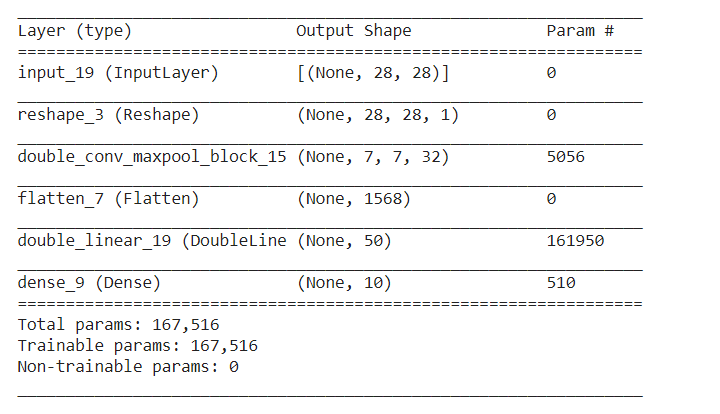

In [10]:
def build_model():
    Input = tf.keras.Input(shape=(28,28))
    reshape = tf.keras.layers.Reshape((28,28,1))(Input)
    Dense1 = DoubleConvMaxpoolBlock()(reshape)
    flatten = tf.keras.layers.Flatten()(Dense1)
    Dense2 = DoubleLinear()(flatten)
    Output = tf.keras.layers.Dense(units=10, activation='softmax')(Dense2)
    model=tf.keras.models.Model(inputs=Input, outputs=Output)
    model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, 
                        optimizer= tf.keras.optimizers.Adam(learning_rate=3e-5), metrics=['accuracy'])
    model.summary()
    return model
model = build_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
double_conv_maxpool_block (D (None, 7, 7, 32)          5056      
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
double_linear (DoubleLinear) (None, 50)                161950    
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 167,516
Trainable params: 167,516
Non-trainable params: 0
_______________________________________________________

In [11]:
mc = tf.keras.callbacks.ModelCheckpoint(filepath="/content/epoch:{epoch:02d}.hdf5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0, 
                                     save_best_only=True)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc]) 

Epoch 1/10
211/211 [==============================] - 39s 183ms/step - loss: 2.2685 - accuracy: 0.2850 - val_loss: 2.1791 - val_accuracy: 0.5505
Epoch 2/10
211/211 [==============================] - 39s 184ms/step - loss: 1.7794 - accuracy: 0.6193 - val_loss: 1.2562 - val_accuracy: 0.7188
Epoch 3/10
211/211 [==============================] - 39s 184ms/step - loss: 0.8892 - accuracy: 0.7869 - val_loss: 0.6791 - val_accuracy: 0.8120
Epoch 4/10
211/211 [==============================] - 39s 184ms/step - loss: 0.5746 - accuracy: 0.8429 - val_loss: 0.5139 - val_accuracy: 0.8515
Epoch 5/10
211/211 [==============================] - 39s 184ms/step - loss: 0.4610 - accuracy: 0.8700 - val_loss: 0.4357 - val_accuracy: 0.8743
Epoch 6/10
211/211 [==============================] - 39s 183ms/step - loss: 0.3979 - accuracy: 0.8855 - val_loss: 0.3823 - val_accuracy: 0.8937
Epoch 7/10
211/211 [==============================] - 39s 185ms/step - loss: 0.3546 - accuracy: 0.8966 - val_loss: 0.3479 - val_ac

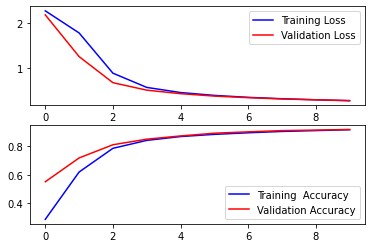

In [12]:
#Vẽ thử đồ thị

f,ax=plt.subplots(2,1) 


ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

ax[1].legend()
plt.show()

In [13]:
def evaluate_model(model, test, test_labels):
    #Xem độ chính xác trên tập test
    evaluation = model.evaluate(test, test_labels, verbose=1)
    print("Model có độ chính xác là {} và loss là {}".format(evaluation[1], evaluation[0]))
evaluate_model(model, X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2580 - accuracy: 0.9224
Model có độ chính xác là 0.9223999977111816 và loss là 0.25803425908088684
